<a href="https://colab.research.google.com/github/waterbean0403/TIL/blob/main/04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""# 확률적 경사 하강법"""

"""## SGDClassifier"""

import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()     # Species 열을 제외한 나머지 5개는 입력 데이터로 사용
fish_target = fish['Species'].to_numpy()     # Species 열은 타깃 데이터

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)     # 강조: 꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 함

In [11]:
from sklearn.linear_model import SGDClassifier     # 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)     # loss는 손실 함수의 종류 지정. 여기에서는 loss='log_loss'로 지정하여 로지스틱 손실 함수 지정. max_iter는 수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트 정확도 낮음. 지정한 반복 횟수 10번이 부족함
# 아래 오류도 같은 이유로 기재됨

0.773109243697479
0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
sc.partial_fit(train_scaled, train_target)     # 모델을 이어서 훈련할 때는 partial_fit() 메서드 사용. fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련 가능

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도 향상

0.7815126050420168
0.8


In [14]:
"""## 에포크와 과대/과소적합"""

import numpy as np

# 이 예제에서는 fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용
# partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit 메서드에 전달해야 함
# np.unique() 함수로 train_target에 있는 7개의 생선 목록 만든 뒤, 에포크마다 점수 기록할 2개의 리스트 준비
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
for _ in range(0, 300):     # 300번의 에포크동안 훈련 반복
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

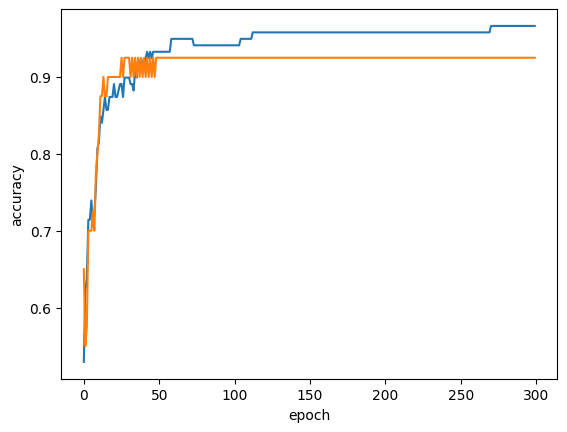

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음
# 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮음
# 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보임

In [18]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)     # SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동으로 멈춤. tol 매개변수에서 향상될 최솟값 지정
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [20]:
# 힌지 손실을 사용해 같은 반복 횟수 동안 모델 훈련하는 예

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
